## Problem Statement: House Price Prediction
Description:- House price prediction is a common problem in the real estate industry and 
involves predicting the selling price of a house based on various features and attributes. The 
problem is typically approached as a regression problem, where the target variable is the price 
of the house, and the features are various attributes of the house 
The features used in house price prediction can include both quantitative and categorical 
variables, such as the number of bedrooms, house area, bedrooms, furnished, nearness to 
main road, and various amenities such as a garage and other factors that may influence the 
value of the property.
Accurate predictions can help agents and appraisers price homes correctly, while 
homeowners can use the predictions to set a reasonable asking price for their properties. 
Accurate house price prediction can also be useful for buyers who are looking to make 
informed decisions about purchasing a property and obtaining a fair price for their 
investment.

## Building a Regression Model

In [1]:
# Import the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
data=pd.read_csv('Housing.csv')

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [4]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,unfurnished


In [5]:
# checking the dataype of the parameters(Columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [6]:
# To know columns
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'furnishingstatus'],
      dtype='object')

### Perform descriptive statistics on the dataset

In [7]:
# Descriptive Analysis
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Perform Below Visualization
● Univariate Analysis ● Bi - Variate Analysis ● Multi - Variate Analysis

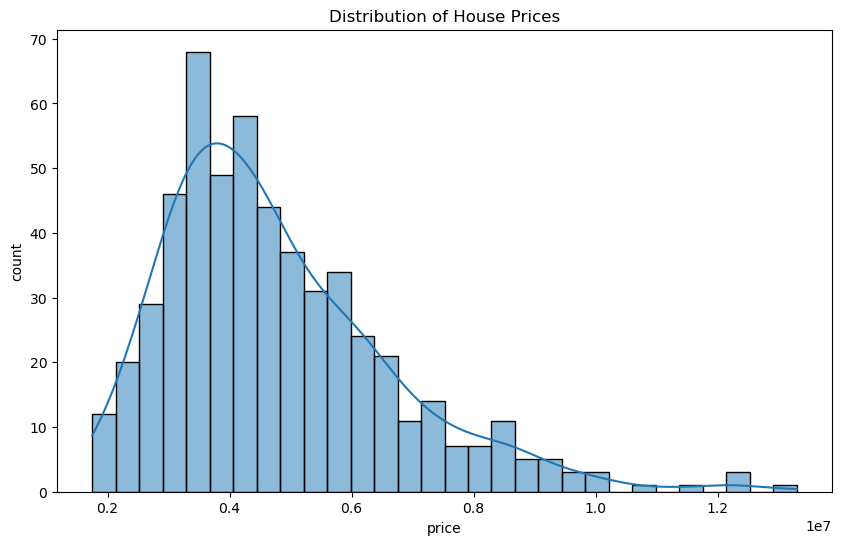

In [8]:
# Univariate Analysis
# Example: Histogram of house prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('price')
plt.ylabel('count')
plt.show()

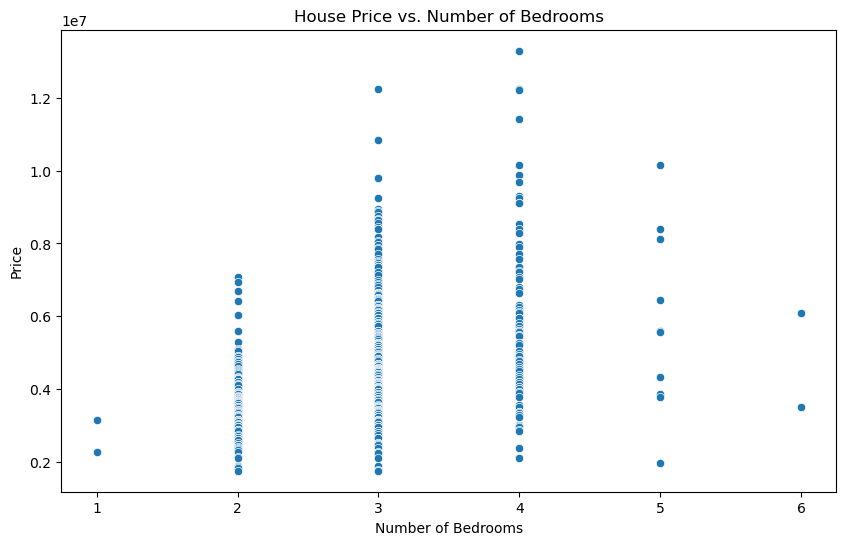

In [9]:
# Bivariate Analysis
# Example: Scatter plot of house price vs. number of bedrooms
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='bedrooms', y='price')
plt.title('House Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_32784\3045808490.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


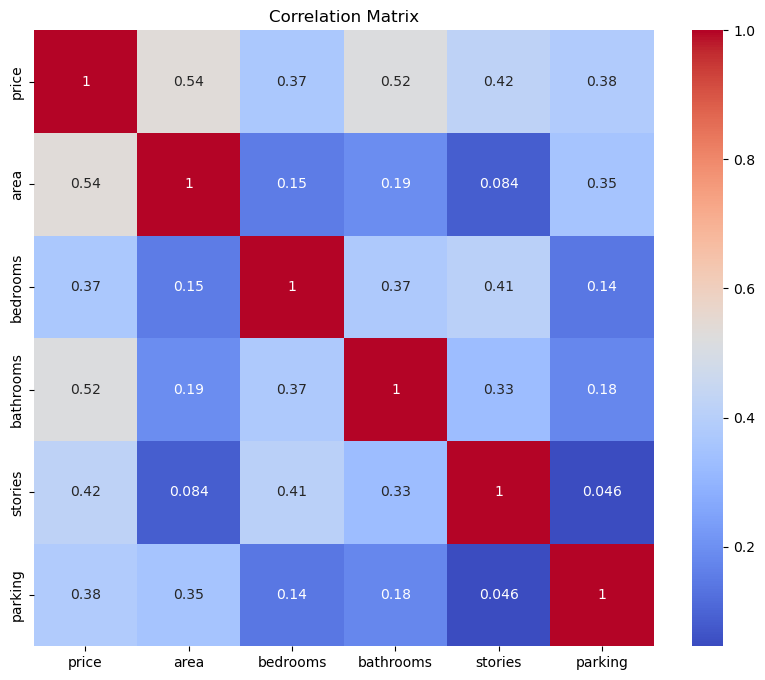

In [10]:
# Multivariate Analysis
# Example: Heatmap of correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Handle the Missing values

In [11]:
data.isna()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data.isnull().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
furnishingstatus    False
dtype: bool

In [13]:
#Check for missing values 
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [14]:
# There are no NULL values in the dataset, hence it is clean.

### Find the outliers and replace them outliers

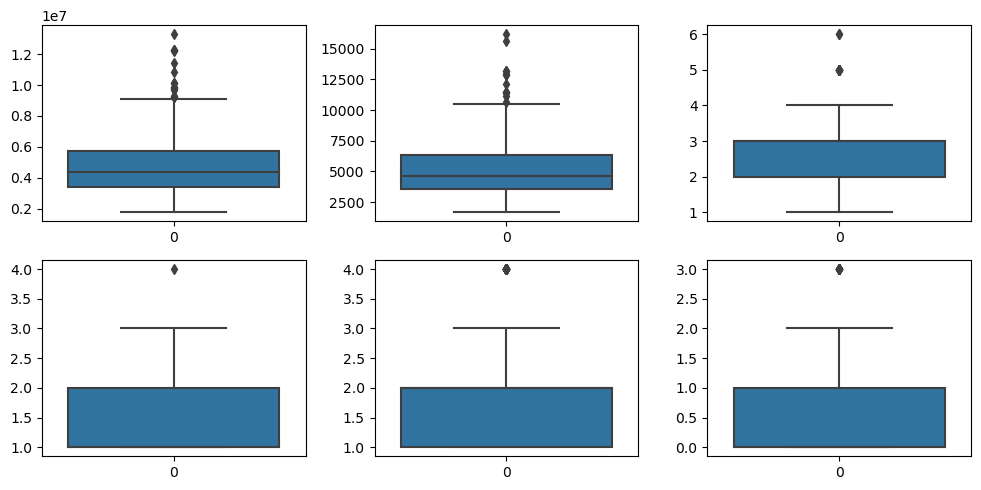

In [15]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['price'], ax = axs[0,0])
plt2 = sns.boxplot(data['area'], ax = axs[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(data['parking'], ax = axs[1,2])

plt.tight_layout()

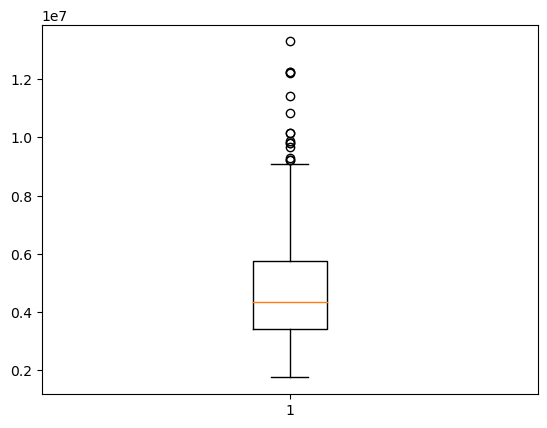

In [16]:
# Outlier Treatment
# Price and area have considerable outliers.
# We can drop the outliers as we have sufficient data.
# outlier treatment for price
plt.boxplot(data.price)
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
housing = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]

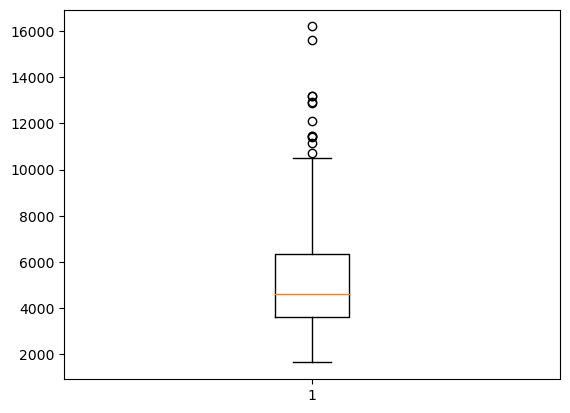

In [17]:
# outlier treatment for area
plt.boxplot(data.area)
Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3 - Q1
housing = data[(data.area >= Q1 - 1.5*IQR) & (data.area <= Q3 + 1.5*IQR)]

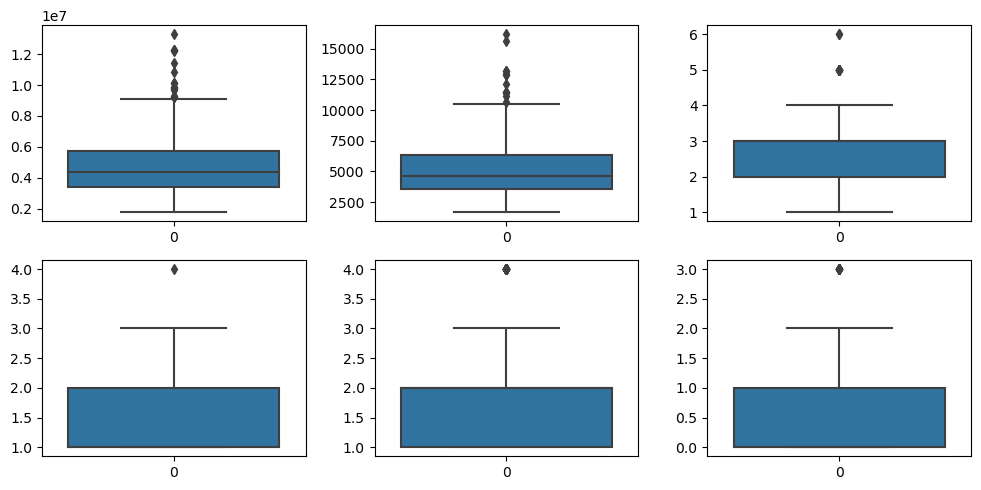

In [18]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['price'], ax = axs[0,0])
plt2 = sns.boxplot(data['area'], ax = axs[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(data['parking'], ax = axs[1,2])

plt.tight_layout()

### Check for Categorical columns and perform encoding

In [19]:
# Check for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'furnishingstatus'],
      dtype='object')


In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Perform label encoding for each categorical column
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Display the updated dataset
print(data.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  furnishingstatus  
0         0                0                1        2                 0  
1         0                0                1        3                 0  
2         1                0                0        2                 1  
3         1                0                1        3                 0  
4         1                0                1        2                 0  


### Split the data into dependent and independent variables

In [21]:
X = data.drop('price', axis=1)  # Independent variables 
y = data['price']  # Dependent variable 

# Display the independent variables 
print("Independent variables")
print(X.head())

print(X)

Independent variables
   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  furnishingstatus  
0                0                1        2                 0  
1                0                1        3                 0  
2                0                0        2                 1  
3                0                1        3                 0  
4                0                1        2                 0  
     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    89

In [22]:
print(X.head())

   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  furnishingstatus  
0                0                1        2                 0  
1                0                1        3                 0  
2                0                0        2                 1  
3                0                1        3                 0  
4                0                1        2                 0  


In [23]:
# Display the dependent variable 
print("\nDependent variable")
print(y.head())


Dependent variable
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


### Scale the independent variables


In [24]:
name=X.columns
name

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking',
       'furnishingstatus'],
      dtype='object')

In [25]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X_scaled=scale.fit_transform(X)
X_scaled

array([[0.39656357, 0.6       , 0.33333333, ..., 1.        , 0.66666667,
        0.        ],
       [0.5024055 , 0.6       , 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.57113402, 0.4       , 0.33333333, ..., 0.        , 0.66666667,
        0.5       ],
       ...,
       [0.13539519, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.08659794, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15120275, 0.4       , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [26]:
 X=pd.DataFrame(X_scaled,columns=name)
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,0.0
1,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0
2,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,0.5
3,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,0.0
4,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,1.0
541,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.5
542,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.0
543,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


### Split the data into training and testing


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
542,0.135395,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
496,0.161512,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
484,0.095533,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
507,0.134021,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
252,0.564261,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.5


In [28]:
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
239,0.161512,0.4,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.333333,0.0
113,0.547766,0.4,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0
325,0.124399,0.6,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.5
66,0.793814,0.2,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,0.333333,0.0
479,0.138144,0.6,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,1.0


In [29]:
y_train

542    1750000
496    2695000
484    2870000
507    2590000
252    4515000
        ...   
70     6790000
277    4305000
9      9800000
359    3710000
192    5040000
Name: price, Length: 436, dtype: int64

In [30]:
y_test

239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
        ...   
76     6650000
132    5810000
311    4123000
464    3080000
155    5530000
Name: price, Length: 109, dtype: int64

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 11)
(109, 11)
(436,)
(109,)


### Build the Model


#### Linear Regression

In [32]:
#Model Building
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [33]:
#train the model
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
#test the model 
y_pred=lr.predict(X_test)

In [35]:
y_pred #prediction

array([ 4130485.81157512,  5951629.29605473,  4493296.54353272,
        7780433.96281394,  2889973.78705374,  7363347.86089152,
        3305453.71240391,  3183735.32926523,  2870669.15110932,
        8667784.23517628,  6855584.77571023,  3912231.71957891,
        3950706.37799032,  4967222.32060846,  4227263.05053569,
        1957043.8694037 ,  4234806.79975857,  3783048.83430772,
        3322342.80946077,  4762611.34903235,  6301684.24187682,
        6686567.8521852 ,  4803173.15534444,  2725565.83775742,
        4981094.7749616 ,  6002154.03323215,  4931557.20886866,
        5653505.15565481,  5918906.1869429 ,  5484328.31840539,
        3394692.78101427,  5613665.83642399,  6823856.64204786,
        3021889.46603105,  4469536.60652045,  5255330.89824818,
        5225810.41766367,  3832135.90379033,  3054328.68223337,
        4099284.65283762,  8393400.53933588,  5198130.87753675,
        6667121.71334807,  3817227.46104522,  3210941.01557783,
        6544628.01013035,  4746442.99347

In [36]:
y_test # Actual outcome

239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
        ...   
76     6650000
132    5810000
311    4123000
464    3080000
155    5530000
Name: price, Length: 109, dtype: int64

In [37]:
E=y_test-y_pred
E

239    4.545142e+05
113    1.313707e+05
325   -4.857965e+05
66    -8.504340e+05
479    5.002621e+04
           ...     
76    -2.846155e+05
132    5.000737e+05
311   -2.013586e+05
464   -1.934271e+06
155   -4.190739e+05
Name: price, Length: 109, dtype: float64

In [38]:
from sklearn.metrics import r2_score
acc=r2_score(y_pred,y_test)
acc

0.599189239451688

#### Multi Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model

LinearRegression()

In [40]:
model.fit(X_train,y_train)
pred=model.predict(X_test)

In [41]:
pred

array([ 4130485.81157512,  5951629.29605473,  4493296.54353272,
        7780433.96281394,  2889973.78705374,  7363347.86089152,
        3305453.71240391,  3183735.32926523,  2870669.15110932,
        8667784.23517628,  6855584.77571023,  3912231.71957891,
        3950706.37799032,  4967222.32060846,  4227263.05053569,
        1957043.8694037 ,  4234806.79975857,  3783048.83430772,
        3322342.80946077,  4762611.34903235,  6301684.24187682,
        6686567.8521852 ,  4803173.15534444,  2725565.83775742,
        4981094.7749616 ,  6002154.03323215,  4931557.20886866,
        5653505.15565481,  5918906.1869429 ,  5484328.31840539,
        3394692.78101427,  5613665.83642399,  6823856.64204786,
        3021889.46603105,  4469536.60652045,  5255330.89824818,
        5225810.41766367,  3832135.90379033,  3054328.68223337,
        4099284.65283762,  8393400.53933588,  5198130.87753675,
        6667121.71334807,  3817227.46104522,  3210941.01557783,
        6544628.01013035,  4746442.99347

In [42]:
y_test

239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
        ...   
76     6650000
132    5810000
311    4123000
464    3080000
155    5530000
Name: price, Length: 109, dtype: int64

In [43]:
E=pred-y_test
E

239   -4.545142e+05
113   -1.313707e+05
325    4.857965e+05
66     8.504340e+05
479   -5.002621e+04
           ...     
76     2.846155e+05
132   -5.000737e+05
311    2.013586e+05
464    1.934271e+06
155    4.190739e+05
Name: price, Length: 109, dtype: float64

In [44]:
from sklearn.metrics import r2_score
r2_score(pred,y_test)*100

59.9189239451688

#### Logistic Regression

In [45]:
#Model Building
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [46]:
lr.fit(X_train,y_train)

LogisticRegression()

In [47]:
pred=lr.predict(X_test)
pred

array([4200000, 3920000, 4200000, 3920000, 4200000, 7350000, 3500000,
       4200000, 3500000, 7350000, 4200000, 4200000, 4900000, 4900000,
       4900000, 4200000, 4900000, 3500000, 4200000, 4480000, 4900000,
       5600000, 4200000, 3500000, 4900000, 5950000, 3640000, 7350000,
       4200000, 4900000, 3500000, 4200000, 4900000, 3500000, 4200000,
       3500000, 4200000, 4900000, 3500000, 3990000, 7350000, 4200000,
       4200000, 4900000, 3500000, 4200000, 4900000, 3500000, 3640000,
       5950000, 3500000, 5950000, 4200000, 3500000, 3500000, 3500000,
       4200000, 3500000, 3500000, 4900000, 3500000, 4900000, 4200000,
       4200000, 3010000, 5040000, 5250000, 4200000, 4900000, 3500000,
       4900000, 7350000, 4900000, 4200000, 4900000, 4900000, 4200000,
       4200000, 4200000, 3500000, 4900000, 5600000, 4200000, 5250000,
       3500000, 4200000, 4200000, 4900000, 4900000, 4900000, 4200000,
       5950000, 3500000, 3640000, 4200000, 8400000, 4200000, 4200000,
       3500000, 3500

In [48]:
pred1=lr.predict(X_train)
pred1

array([3500000, 3500000, 4200000, 3500000, 3500000, 4200000, 3500000,
       5250000, 3500000, 3640000, 5950000, 4200000, 4200000, 4200000,
       4200000, 3500000, 4200000, 5950000, 3500000, 4200000, 3500000,
       2450000, 3500000, 8400000, 3500000, 3500000, 3500000, 4900000,
       4200000, 4200000, 4200000, 4200000, 3500000, 4900000, 4900000,
       7350000, 8400000, 4200000, 5250000, 5250000, 4200000, 3500000,
       3500000, 4200000, 5600000, 5950000, 4200000, 8400000, 5950000,
       4200000, 3500000, 3500000, 3500000, 3500000, 7350000, 3500000,
       3500000, 3500000, 4200000, 4200000, 4200000, 4900000, 4200000,
       4200000, 3500000, 7350000, 3500000, 3500000, 4200000, 3640000,
       3500000, 6020000, 4480000, 3500000, 3500000, 3500000, 3640000,
       3500000, 3500000, 5950000, 3640000, 7350000, 3500000, 4900000,
       2940000, 7350000, 5600000, 4900000, 3500000, 7350000, 4200000,
       5950000, 4200000, 5950000, 4200000, 3500000, 5250000, 5950000,
       3500000, 4900

In [49]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [50]:
accuracy_score(y_train,pred1)

0.09403669724770643

In [51]:
accuracy_score(y_test,pred)

0.03669724770642202

In [52]:
confusion_matrix(y_test,pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     1750000       0.00      0.00      0.00         1
     1890000       0.00      0.00      0.00         1
     1960000       0.00      0.00      0.00         1
     2380000       0.00      0.00      0.00         1
     2660000       0.00      0.00      0.00         1
     2835000       0.00      0.00      0.00         1
     2940000       0.00      0.00      0.00         2
     3010000       0.00      0.00      0.00         0
     3080000       0.00      0.00      0.00         2
     3129000       0.00      0.00      0.00         1
     3150000       0.00      0.00      0.00         3
     3290000       0.00      0.00      0.00         5
     3325000       0.00      0.00      0.00         1
     3332000       0.00      0.00      0.00         1
     3360000       0.00      0.00      0.00         1
     3395000       0.00      0.00      0.00         1
     3500000       0.08      0.40      0.14         5
     3535000       0.00    

C:\Users\harsh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

#### Ridge and lasso

In [54]:
#importing Ridge and Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
r=Ridge()
l=Lasso()

In [55]:
r.fit(X_train,y_train)

Ridge()

In [56]:
l.fit(X_train,y_train)

Lasso()

In [57]:
pred1=r.predict(X_test)
pred2=l.predict(X_test)

In [58]:
pred1

array([ 4195856.90517042,  5864718.11425884,  4580911.45240111,
        7482233.19909076,  2918193.45985188,  7297630.47723542,
        3391281.86952099,  3232282.50450392,  2932450.53111364,
        8551010.88296727,  6777348.64336336,  3956839.32669081,
        4001622.35779294,  4967797.82176844,  4203858.69210574,
        2015230.74561516,  4228204.18036041,  3762806.5411674 ,
        3356427.68756846,  4846509.22503371,  6159037.42084511,
        6525720.85652918,  4830477.02921605,  2829759.7751942 ,
        4930259.68586438,  6040141.78315633,  4920669.5181914 ,
        5702754.66660397,  5828259.5464341 ,  5472926.43591663,
        3434189.54544098,  5655506.42426936,  6801201.67673475,
        3067288.5560321 ,  4437322.17684532,  5295773.420763  ,
        5254145.87718538,  3895897.08825461,  3094034.6505699 ,
        4198073.45106151,  8279611.36350634,  5101498.14260867,
        6582561.63806065,  3803758.94656163,  3307008.10394695,
        6463463.20959435,  4815666.91312

In [59]:
pred2

array([ 4130491.26557231,  5951620.16171854,  4493297.38960569,
        7780395.82643018,  2889978.62456049,  7363338.67081457,
        3305460.82293172,  3183746.37360477,  2870681.89129402,
        8667766.08269889,  6855573.37203069,  3912236.64803012,
        3950711.47158217,  4967218.88928105,  4227261.95863451,
        1957057.27144086,  4234813.71519698,  3783049.03535959,
        3322352.79140751,  4762621.51753583,  6301669.87409393,
        6686533.06047773,  4803175.60015067,  2725576.92993418,
        4981092.68750015,  6002151.59408407,  4931554.85016006,
        5653504.6664762 ,  5918899.58075068,  5484325.68157407,
        3394703.0392631 ,  5613650.01890191,  6823848.93542851,
        3021900.89728433,  4469521.62004814,  5255337.16267895,
        5225805.02267671,  3832142.02370341,  3054345.8067584 ,
        4099295.14949939,  8393389.04282679,  5198123.37116944,
        6667116.22192581,  3817227.86442327,  3210948.94418778,
        6544621.84121476,  4746444.64742

In [60]:
from sklearn import metrics
#MSE (Mean Square Error)
print(metrics.mean_squared_error(y_test,pred1))
print(metrics.mean_squared_error(y_test,pred2))

992405739929.5162
1027863463042.204


In [61]:
#RMSE(Root Mean Square Error)
print(np.sqrt(metrics.mean_squared_error(y_test,pred1)))
print(np.sqrt(metrics.mean_squared_error(y_test,pred2)))

996195.633362
1013836.0138810438


In [62]:
# R Squared
print(metrics.r2_score(y_test,pred1))
print(metrics.r2_score(y_test,pred2))

0.6555962234628716
0.6432910006532124


#### Hence Comparing all Regression Model above As r2 Score is higher for Ridge regression we will use Ridge Regression ML Model for Deployment.